In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = pd.read_csv("Credit_card.csv")

In [ ]:
print(data.shape)

In [ ]:
data.head()

In [ ]:
target=pd.read_csv("Credit_card_label.csv")
print(target.shape)
print(target.head)

In [ ]:
print('label NAN: ', data.isna().sum(), "\n")
print('Target NAN: ', target.isna().sum())

In [ ]:
data.info()

In [45]:
Object_Columns = data.select_dtypes(exclude=['int', 'float']).columns

Object_Columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')

In [46]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [47]:
data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [48]:
target['label'].value_counts()

label
0    1373
1     175
Name: count, dtype: int64

In [49]:
data[Object_Columns].nunique()

GENDER              2
Car_Owner           2
Propert_Owner       2
Type_Income         4
EDUCATION           5
Marital_status      5
Housing_type        6
Type_Occupation    18
dtype: int64

In [50]:
print('Shape Before droping Type_Occupation:',data.shape, '\n')
data_clean = data.drop(columns=['Type_Occupation'])
print('Shape after droping Type_Occupation:',data_clean.shape, '\n')
data_clean = data_clean.dropna()
print('Shape after droping NAN: ',data_clean.shape)


Shape Before droping Type_Occupation: (1548, 18) 

Shape after droping Type_Occupation: (1548, 17) 

Shape after droping NAN:  (1496, 17)


In [51]:
object_col = data_clean.select_dtypes(exclude=['int', 'float']).columns
object_col


Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type'],
      dtype='object')

In [52]:
encoder = LabelEncoder()
for col in object_col:
    data_clean[col] = encoder.fit_transform(data_clean[col])


In [53]:
data_clean.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
0,5008827,1,1,1,0,180000.0,1,1,1,1,-18772.0,365243,1,0,0,0,2
1,5009744,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2
4,5009752,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2
6,5009754,0,1,0,0,315000.0,0,1,1,1,-13557.0,-586,1,1,1,0,2
7,5009894,0,0,0,0,180000.0,1,4,1,1,-22134.0,365243,1,0,0,0,2


In [54]:
data_clean.describe()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.496000e+03,1496.000000,1496.000000,1496.000000,1496.000000,1.496000e+03,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000,1496.0,1496.000000,1496.000000,1496.000000,1496.000000
mean,5.079217e+06,0.366979,0.399733,0.653075,0.415775,1.907750e+05,1.868984,3.072193,1.435160,1.296123,-16036.192513,59290.681818,1.0,0.205882,0.304813,0.094251,2.165107
std,4.168109e+04,0.482142,0.490007,0.476151,0.780784,1.131384e+05,1.270799,1.346419,0.986772,0.972470,4226.506557,137766.774169,0.0,0.404480,0.460482,0.292276,0.951752
min,5.008827e+06,0.000000,0.000000,0.000000,0.000000,3.375000e+04,0.000000,0.000000,0.000000,0.000000,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045349e+06,0.000000,0.000000,0.000000,0.000000,1.210500e+05,1.000000,1.000000,1.000000,1.000000,-19543.000000,-3229.250000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.079010e+06,0.000000,0.000000,1.000000,0.000000,1.660500e+05,3.000000,4.000000,1.000000,1.000000,-15686.000000,-1575.500000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115801e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,4.000000,2.000000,1.000000,-12417.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,1.000000,1.000000,1.000000,14.000000,1.575000e+06,3.000000,4.000000,4.000000,5.000000,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


<Axes: >

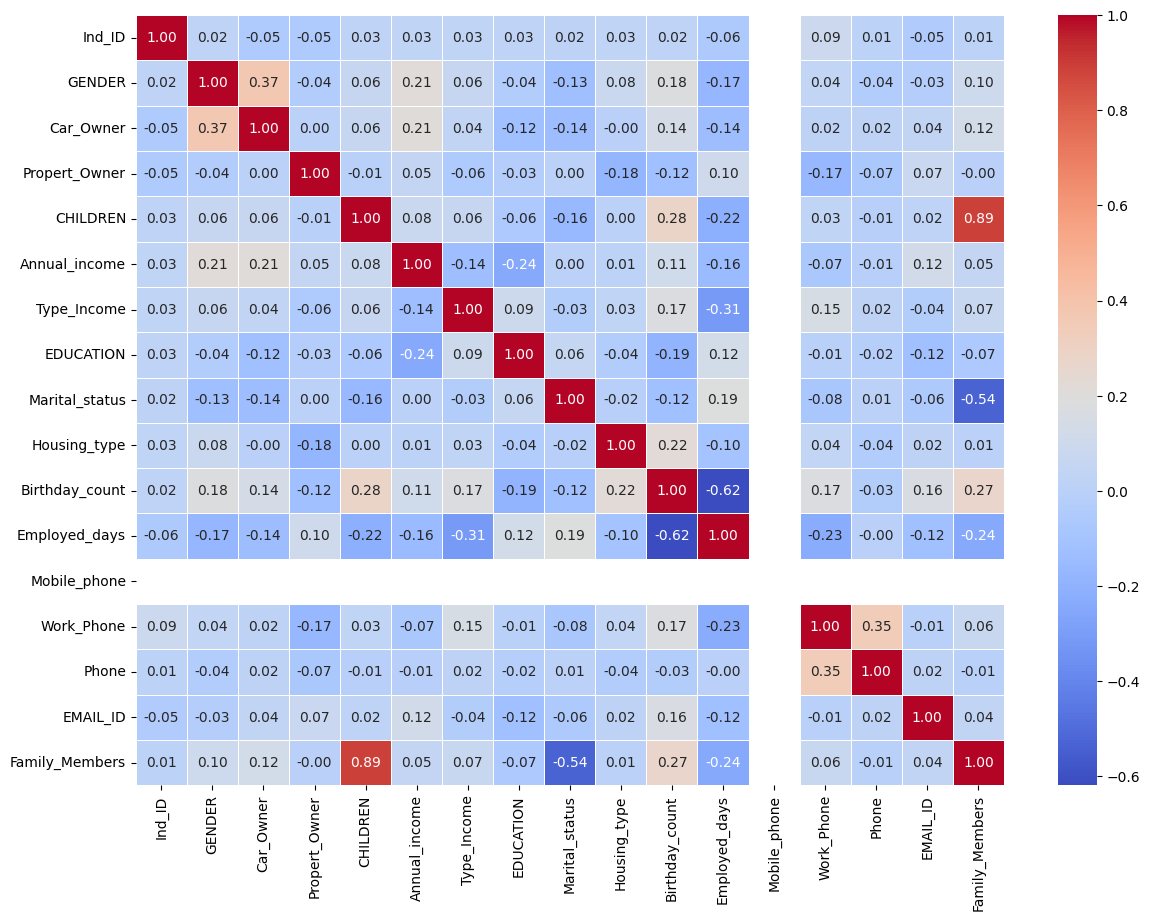

In [57]:
numeric_data = data_clean.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


In [59]:
df1 = pd.merge(data_clean, target)


<Axes: >

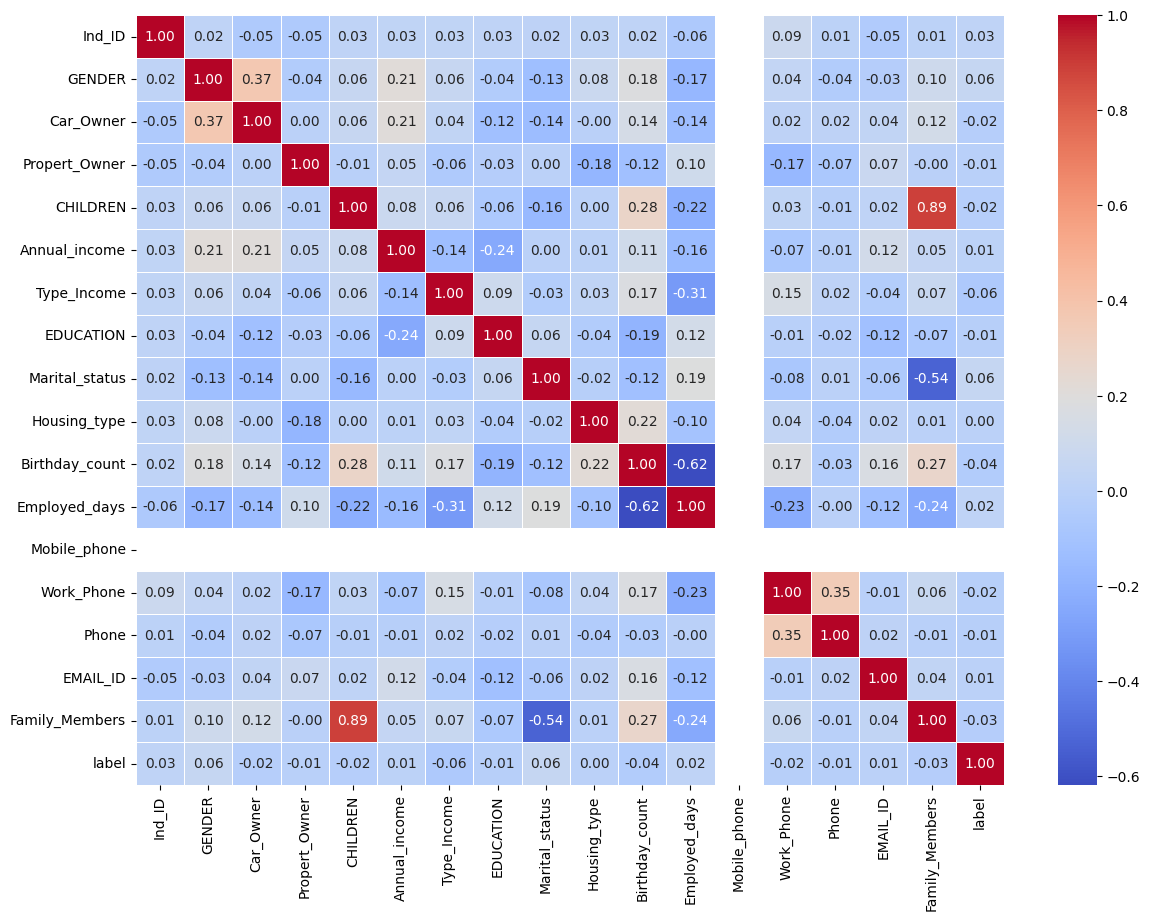

In [62]:
plt.figure(figsize=(14, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


In [63]:

df1 = pd.merge(data_clean, target, left_index=True, right_index=True)

X = df1.drop('label', axis=1)  # Replace 'target_column_name' with the actual target column name
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)  # max_iter is set high to ensure convergence
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [64]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Accuracy: 0.9066666666666666
Confusion Matrix:
[[272   0]
 [ 28   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       272
           1       0.00      0.00      0.00        28

    accuracy                           0.91       300
   macro avg       0.45      0.50      0.48       300
weighted avg       0.82      0.91      0.86       300



C:\Users\maxma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maxma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maxma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

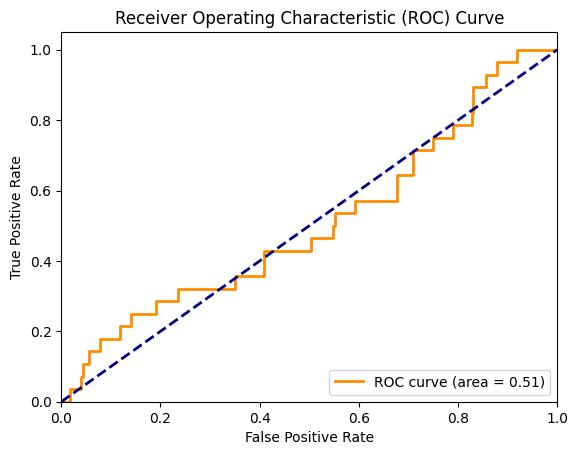

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
